In [1]:
import os
import cx_Oracle
import pandas as pd
import numpy as np
import pickle
from datetime import date,datetime
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, cross_val_score 
import time
import matplotlib.pyplot as plt
from sklearn.utils import resample
import datetime

In [2]:
#connection = cx_Oracle.connect('HCIN_GUPTAN1[AP_UWI]/aGqQ4jnX92NG@INCL02.IN.PROD/HWIN_USR_DEV.HOMECREDIT.IN')
#cursor = connection.cursor()
#os.chdir(r"C:\Users\aman.khatri91425\Desktop\HomeCredit\Bigdata\Common Maps KNN")
#qu1= """
# select * from TBD_COMMON_MAPS_DATA_1
# where risk_agrf120 =1 
# """
#df = pd.read_sql(qu1,connection)
#df.to_pickle(r"C:\Users\aman.khatri91425\Desktop\HomeCredit\Bigdata\Common Maps KNN\data_dump_income_pred.pkl")
#df.to_csv(r"C:\Users\aman.khatri91425\Desktop\HomeCredit\Bigdata\Common Maps KNN\data_dump_income_pred.csv")

In [3]:
df = pd.read_pickle(r"C:\Users\aman.khatri91425\Desktop\HomeCredit\Bigdata\Common Maps KNN\data_dump_income_pred.pkl")

In [4]:
df = df[["SKP_CREDIT_CASE","TIME_DECISION_DATE","CUS_LAT","CUS_LONG","RISK_FSTQPD30","RISK_AGRF120",
"PRODUCT_GROUP","RISK_SCORE","GRID_ID","CLIENT_INR_INCOME","SCORE_CB"]]

In [5]:
df.dropna(subset = ["RISK_SCORE"], inplace = True)

In [6]:
df.shape

(3714611, 11)

In [7]:
df["MONTH_STR"] = df["TIME_DECISION_DATE"].dt.strftime("%Y-%m")

In [8]:
# Split Train and Test Data Set
df_train = df[(df["TIME_DECISION_DATE"]>=datetime.datetime(2018, 2, 1)) & 
              (df["TIME_DECISION_DATE"]<=datetime.datetime(2018, 12, 1))]
df_valid = df[(df["TIME_DECISION_DATE"]>=datetime.datetime(2019, 1, 1)) & 
              (df["TIME_DECISION_DATE"]<=datetime.datetime(2019, 1, 31))]
df_test = df[(df["TIME_DECISION_DATE"]>=datetime.datetime(2019, 2, 1)) & 
              (df["TIME_DECISION_DATE"]<=datetime.datetime(2019, 3, 31))]

In [9]:
print(df_train.shape)
print(df_valid.shape)
print(df_test.shape)


(2196025, 12)
(231119, 12)
(384013, 12)


In [10]:
seed = 26
df_train= df_train.sample(n=800000, random_state=seed)

In [11]:
X_train = df_train[["CUS_LAT","CUS_LONG","TIME_DECISION_DATE"]]
X_test = df_test[["CUS_LAT","CUS_LONG","TIME_DECISION_DATE"]]
X_valid = df_valid[["CUS_LAT","CUS_LONG","TIME_DECISION_DATE"]]

y_train = df_train["CLIENT_INR_INCOME"]
y_test =  df_test["CLIENT_INR_INCOME"]
y_valid =  df_valid["CLIENT_INR_INCOME"]


In [36]:
rmse_val = [] #to store rmse values for different k
for K in np.arange(1,1000,100):
    model = KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train[["CUS_LAT","CUS_LONG"]], np.ravel(y_train))  #fit the model
    pred=model.predict(X_valid[["CUS_LAT","CUS_LONG"]]) #make prediction on valid set
    error = np.sqrt(metrics.mean_squared_error(y_valid,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)
    

RMSE value for k=  1 is: 1181822.9454774344
RMSE value for k=  101 is: 1125009.9566798904
RMSE value for k=  201 is: 1124458.2384877638
RMSE value for k=  301 is: 1123068.693643817
RMSE value for k=  401 is: 1122750.9133868525
RMSE value for k=  501 is: 1122143.7295285752
RMSE value for k=  601 is: 1121757.352848705
RMSE value for k=  701 is: 1121519.8144344732
RMSE value for k=  801 is: 1121371.6763505966
RMSE value for k=  901 is: 1121235.1153080037


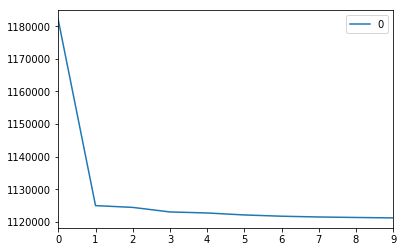

In [37]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [38]:
rmse_val = [] #to store rmse values for different k
for K in np.arange(1,100,10):
    model = KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train[["CUS_LAT","CUS_LONG"]], np.ravel(y_train))  #fit the model
    pred=model.predict(X_valid[["CUS_LAT","CUS_LONG"]]) #make prediction on valid set
    error = np.sqrt(metrics.mean_squared_error(y_valid,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 1181822.9454774344
RMSE value for k=  11 is: 1137188.8168561882
RMSE value for k=  21 is: 1153762.7149824556
RMSE value for k=  31 is: 1142259.49500158
RMSE value for k=  41 is: 1134628.7167841096
RMSE value for k=  51 is: 1131045.9582300335
RMSE value for k=  61 is: 1128713.9347751357
RMSE value for k=  71 is: 1127054.396141572
RMSE value for k=  81 is: 1126084.1372929448
RMSE value for k=  91 is: 1125387.366597627


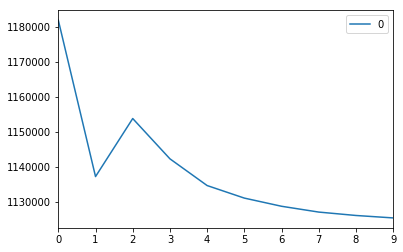

In [39]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [63]:
from sklearn.neighbors import KNeighborsRegressor
# Create KNN classifier
knn = KNeighborsRegressor(n_neighbors=1000)
bst = knn.fit(X_train[["CUS_LAT","CUS_LONG"]], np.ravel(y_train))
pred_train=bst.predict(X_train[["CUS_LAT","CUS_LONG"]])
pred_valid=bst.predict(X_valid[["CUS_LAT","CUS_LONG"]])
pred_test=bst.predict(X_test[["CUS_LAT","CUS_LONG"]])

MemoryError: 

In [ ]:
#np.sqrt(metrics.mean_squared_error(y_test,pd.Series([-100000]*X_test.shape[0])))
np.sqrt(metrics.mean_squared_error(pd.Series([1,2]),pd.Series([-1,-1])))

In [66]:
print("rmse train:",np.sqrt(metrics.mean_squared_error(y_train,pred_train)))
print("rmse valid:",np.sqrt(metrics.mean_squared_error(y_valid,pred_valid)))
print("rmse test:",np.sqrt(metrics.mean_squared_error(y_test,pred_test)))
print("rmse test random:",np.sqrt(metrics.mean_squared_error(y_test,pd.Series([-50000]*X_test.shape[0]))))

rmse train: 1383432.00709546
rmse valid: 1121149.9320809061
rmse test: 995713.6492747591
rmse test random: 997668.9267733523


In [ ]:
df_test["PRED_INCOME"] = pred_test

In [ ]:
df_test.head()

In [65]:
print("RMSE DEFAULT:",np.sqrt(metrics.mean_squared_error(df_test.loc[df_test["RISK_FSTQPD30"]==1,"PRED_INCOME"],df_test.loc[df_test["RISK_FSTQPD30"]==1,"CLIENT_INR_INCOME"])))
print("RMSE NON DEFAULT:",np.sqrt(metrics.mean_squared_error(df_test.loc[df_test["RISK_FSTQPD30"]==0,"PRED_INCOME"],df_test.loc[df_test["RISK_FSTQPD30"]==0,"CLIENT_INR_INCOME"])))

RMSE DEFAULT: 45808.47030793558
RMSE NON DEFAULT: 1049926.823162236


In [64]:
df_test[["CLIENT_INR_INCOME","RISK_FSTQPD30"]].groupby("RISK_FSTQPD30").mean()

,CLIENT_INR_INCOME
RISK_FSTQPD30,
0,23799.988718
1,18680.353605


In [67]:
df_test[["PRED_INCOME","RISK_FSTQPD30"]].groupby("RISK_FSTQPD30").mean()

,PRED_INCOME
RISK_FSTQPD30,
0,22659.522213
1,23471.174908


In [32]:
df_train[["CLIENT_INR_INCOME"]].mean()

CLIENT_INR_INCOME    23870.935234
dtype: float64

In [25]:
param_grid = {'n_neighbors': np.arange(1,1000,100)
#              ,'weights' : ['uniform','distance']
            }
seed = 25

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform')

In [20]:
from sklearn.neighbors import KNeighborsRegressor
# Create KNN classifier
knn = KNeighborsRegressor()
kfolds = StratifiedKFold(3, random_state=1)

clf = RandomizedSearchCV(estimator=knn, param_distributions=param_grid, scoring=['mean_squared_error'], n_iter=5,
                         random_state=seed, cv=kfolds.split(X_train[["CUS_LAT","CUS_LONG"]], y_train), refit='mean_squared_error',error_score=0, return_train_score =True)


In [21]:
print("Randomized search..")

search_time_start = time.time()
clf.fit(X_train[["CUS_LAT","CUS_LONG"]], np.ravel(y_train))
print("Randomized search time:", time.time() - search_time_start)

params = clf.best_params_   #get best parameters
dic=clf.cv_results_    #provides scoring results for each iteration, 50 in this case, mean values can be used 
tmp= pd.DataFrame(dic['params'])

Randomized search..


ValueError: Supported target types are: ('binary', 'multiclass'). Got 'continuous' instead.

In [116]:
pd.DataFrame(dic).to_csv(r"C:\Users\aman.khatri91425\Desktop\HomeCredit\Bigdata\Common Maps KNN\Common Maps-KNN_V3_Income_Prediction_RCV_results.csv")

NameError: name 'dic' is not defined

In [32]:
tmp1= pd.DataFrame(dic)[["param_weights","param_n_neighbors","mean_test_roc_auc","mean_train_roc_auc"]]

In [37]:
tmp1

,param_weights,param_n_neighbors,mean_test_roc_auc,mean_train_roc_auc
0,uniform,741,0.549961,0.573360
1,distance,671,0.528955,0.879760
2,uniform,411,0.550704,0.579561
3,distance,961,0.528997,0.879760
4,distance,501,0.528888,0.879760
5,uniform,631,0.550297,0.574957
6,distance,341,0.528749,0.879754
7,uniform,201,0.549056,0.587388
8,distance,171,0.528249,0.879732
9,distance,551,0.528918,0.879760


In [16]:
print("Best score: {}".format(clf.best_score_))    #best auc score as we took that for refit 


print("Best params: ")

for param_name in sorted(params.keys()):
    print('%s: %r' % (param_name, params[param_name]))

Best score: 0.5507039945311285
Best params: 
n_neighbors: 411
weights: 'uniform'


In [14]:
#update estimated hyperparameter values to new model
from sklearn.neighbors import KNeighborsClassifier
params = {'n_neighbors': 411}
kfolds = StratifiedKFold(4, random_state=1)
knn = KNeighborsClassifier(**params)
# cross validation gini
auc_cv = cross_val_score(knn, X_train[["CUS_LAT","CUS_LONG"]], y_train, scoring='roc_auc', cv=kfolds.split(X_train[["CUS_LAT","CUS_LONG"]], y_train),
                         n_jobs=-1)
gini_cv = (2 * np.array(auc_cv) - 1).mean()


In [15]:
bst = knn.fit(X_train[["CUS_LAT","CUS_LONG"]], np.ravel(y_train))

ypred_train = bst.predict_proba(X_train[["CUS_LAT","CUS_LONG"]])[:, 1]
ypred_test = bst.predict_proba(X_test[["CUS_LAT","CUS_LONG"]])[:, 1]

In [16]:
metric_auc_train = metrics.roc_auc_score(y_train, ypred_train)
metric_auc_test = metrics.roc_auc_score(y_test, ypred_test)

gini_train = 2 * metric_auc_train - 1
gini_test = 2 * metric_auc_test - 1


In [17]:
print("GINI TRAIN:",'{:,.2%}'.format(gini_train))
print("\nGINI TEST:",'{:,.2%}'.format(gini_test))
print("\nGINI CV:",'{:,.2%}'.format(gini_cv))

GINI TRAIN: 15.69%

GINI TEST: 11.76%

GINI CV: 10.24%


In [21]:
df_train_under['PRED_SCORE'] = ypred_train
df_test['PRED_SCORE'] = ypred_test

C:\Users\aman.khatri91425\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [100]:
df_combined_score=df_test[['RISK_SCORE','PRED_SCORE','RISK_FSTQPD30','SKP_CREDIT_CASE', 'TIME_DECISION_DATE']]

In [101]:
#Calculate Gini Lift Logistic Regression
from sklearn.linear_model import LogisticRegression
comb=LogisticRegression()
comb.fit(df_combined_score[['RISK_SCORE','PRED_SCORE']],df_combined_score["RISK_FSTQPD30"])

C:\Users\aman.khatri91425\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [102]:
y_pred_comb=comb.predict_proba(df_combined_score[['RISK_SCORE','PRED_SCORE']])[:,1]

In [103]:
metric_auc_combined = metrics.roc_auc_score(df_combined_score["RISK_FSTQPD30"], y_pred_comb)
metric_auc_knn = metrics.roc_auc_score(df_combined_score["RISK_FSTQPD30"], df_combined_score["PRED_SCORE"])
metric_auc_hc = metrics.roc_auc_score(df_combined_score["RISK_FSTQPD30"], df_combined_score["RISK_SCORE"])


gini_combined = 2 * metric_auc_combined - 1
gini_knn = 2 * metric_auc_knn - 1
gini_hc = 2 * metric_auc_hc - 1

In [104]:
print("gini_combined:",'{:,.2%}'.format(gini_combined))
print("\ngini_knn:",'{:,.2%}'.format(gini_knn))
print("\ngini_hc:",'{:,.2%}'.format(gini_hc))

gini_combined: 24.86%

gini_knn: 11.76%

gini_hc: 25.02%


In [105]:
#Calculate Gini Lift Linear Regression
from sklearn.linear_model import LinearRegression
comb=LinearRegression()
comb.fit(df_combined_score[['RISK_SCORE','PRED_SCORE']],df_combined_score["RISK_FSTQPD30"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [106]:
y_pred_comb=comb.predict(df_combined_score[['RISK_SCORE','PRED_SCORE']])

In [107]:
metric_auc_combined = metrics.roc_auc_score(df_combined_score["RISK_FSTQPD30"], y_pred_comb)
metric_auc_knn = metrics.roc_auc_score(df_combined_score["RISK_FSTQPD30"], df_combined_score["PRED_SCORE"])
metric_auc_hc = metrics.roc_auc_score(df_combined_score["RISK_FSTQPD30"], df_combined_score["RISK_SCORE"])


gini_combined = 2 * metric_auc_combined - 1
gini_knn = 2 * metric_auc_knn - 1
gini_hc = 2 * metric_auc_hc - 1

In [108]:
print("gini_combined:",'{:,.2%}'.format(gini_combined))
print("\ngini_knn:",'{:,.2%}'.format(gini_knn))
print("\ngini_hc:",'{:,.2%}'.format(gini_hc))

gini_combined: 26.57%

gini_knn: 11.76%

gini_hc: 25.02%


In [109]:
df_combined_score["LOGIT_RISK_SCORE"] = [np.log(x/(1-x)) for x in df_combined_score["RISK_SCORE"]]
df_combined_score["LOGIT_PRED_SCORE"] = [np.log(x/(1-x)) for x in df_combined_score["PRED_SCORE"]]

C:\Users\aman.khatri91425\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\aman.khatri91425\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [110]:
#Calculate Gini Lift Logistic Regression (p/1-p) transformation
from sklearn.linear_model import LogisticRegression
comb=LogisticRegression()
comb.fit(df_combined_score[['LOGIT_RISK_SCORE','LOGIT_PRED_SCORE']],df_combined_score["RISK_FSTQPD30"])

C:\Users\aman.khatri91425\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [111]:
y_pred_comb=comb.predict_proba(df_combined_score[['LOGIT_RISK_SCORE','LOGIT_PRED_SCORE']])[:,1]

In [112]:
metric_auc_combined = metrics.roc_auc_score(df_combined_score["RISK_FSTQPD30"], y_pred_comb)
metric_auc_knn = metrics.roc_auc_score(df_combined_score["RISK_FSTQPD30"], df_combined_score["PRED_SCORE"])
metric_auc_hc = metrics.roc_auc_score(df_combined_score["RISK_FSTQPD30"], df_combined_score["RISK_SCORE"])


gini_combined = 2 * metric_auc_combined - 1
gini_knn = 2 * metric_auc_knn - 1
gini_hc = 2 * metric_auc_hc - 1

In [113]:
print("gini_combined:",'{:,.2%}'.format(gini_combined))
print("\ngini_knn:",'{:,.2%}'.format(gini_knn))
print("\ngini_hc:",'{:,.2%}'.format(gini_hc))

gini_combined: 27.18%

gini_knn: 11.76%

gini_hc: 25.02%


In [118]:
df_combined_score["COMB_SCORE"] = y_pred_comb
df_combined_score.to_pickle(r"C:\Users\aman.khatri91425\Desktop\HomeCredit\Bigdata\Common Maps KNN\Combined_Scores.pkl")

C:\Users\aman.khatri91425\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [85]:
#Check Stability of Combined Model
seed = 25522
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(df_combined_score[["PRED_SCORE","RISK_SCORE",'LOGIT_RISK_SCORE','LOGIT_PRED_SCORE']],df_combined_score["RISK_FSTQPD30"], test_size=test_size, random_state=seed)


In [96]:
from sklearn.linear_model import LogisticRegression
comb=LogisticRegression()
comb.fit(X_train[['LOGIT_RISK_SCORE','LOGIT_PRED_SCORE']],y_train)
y_pred_comb_train=comb.predict_proba(X_train[['LOGIT_RISK_SCORE','LOGIT_PRED_SCORE']])[:,1]
y_pred_comb_test=comb.predict_proba(X_test[['LOGIT_RISK_SCORE','LOGIT_PRED_SCORE']])[:,1]


C:\Users\aman.khatri91425\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [97]:
metric_auc_combined_train = metrics.roc_auc_score(y_train, y_pred_comb_train)
metric_auc_knn_train = metrics.roc_auc_score(y_train, X_train["PRED_SCORE"])
metric_auc_hc_train = metrics.roc_auc_score(y_train, X_train["RISK_SCORE"])

metric_auc_combined_test = metrics.roc_auc_score(y_test, y_pred_comb_test)
metric_auc_knn_test = metrics.roc_auc_score(y_test, X_test["PRED_SCORE"])
metric_auc_hc_test = metrics.roc_auc_score(y_test, X_test["RISK_SCORE"])



gini_combined_train = 2 * metric_auc_combined_train - 1
gini_knn_train = 2 * metric_auc_knn_train - 1
gini_hc_train = 2 * metric_auc_hc_train- 1

gini_combined_test = 2 * metric_auc_combined_test - 1
gini_knn_test = 2 * metric_auc_knn_test - 1
gini_hc_test = 2 * metric_auc_hc_test- 1

print("gini_combined_train:",'{:,.2%}'.format(gini_combined_train))
print("\ngini_knn_train:",'{:,.2%}'.format(gini_knn_train))
print("\ngini_hc_train:",'{:,.2%}'.format(gini_hc_train))

print("\ngini_combined_test:",'{:,.2%}'.format(gini_combined_test))
print("\ngini_knn_test:",'{:,.2%}'.format(gini_knn_test))
print("\ngini_hc_test:",'{:,.2%}'.format(gini_hc_test))


gini_combined_train: 27.34%

gini_knn_train: 11.90%

gini_hc_train: 25.15%

gini_combined_test: 26.82%

gini_knn_test: 11.45%

gini_hc_test: 24.72%


In [123]:
df = pd.read_pickle(r"C:\Users\aman.khatri91425\Desktop\HomeCredit\Bigdata\Common Maps KNN\Combined_Scores.pkl")

In [124]:
#connection = cx_Oracle.connect('HCIN_GUPTAN1[AP_UWI]/aGqQ4jnX92NG@INCL02.IN.PROD/HWIN_USR_DEV.HOMECREDIT.IN')
#cursor = connection.cursor()
#os.chdir(r"C:\Users\aman.khatri91425\Desktop\HomeCredit\Bigdata\Common Maps KNN")
#qu1= """
# select skp_credit_case, grid_id from TMP_BD_GRID_DISTANCE_ID_1
# where risk_agrf120 =1 
# and time_decision_date between '01-FEB-19'
# and '31-MAR-19'
# """
#df1 = pd.read_sql(qu1,connection)
#df1.to_pickle(r"C:\Users\aman.khatri91425\Desktop\HomeCredit\Bigdata\Common Maps KNN\data_dump_grid_id.pkl")
#df1.to_csv(r"C:\Users\aman.khatri91425\Desktop\HomeCredit\Bigdata\Common Maps KNN\data_dump_grid_id.csv")

df1 = pd.read_csv(r"C:\Users\aman.khatri91425\Desktop\HomeCredit\Bigdata\Common Maps KNN\data_dump_grid_id.csv")

In [125]:
df = pd.merge(df, df1, on='SKP_CREDIT_CASE')

In [126]:
grid_score = df.groupby("GRID_ID").mean()['PRED_SCORE'].reset_index()
grid_score.columns = ['GRID_ID','MEAN_PRED_SCORE']
grid_score.head()

,GRID_ID,MEAN_PRED_SCORE
0,500_00336_03130,0.430657
1,500_00343_03387,0.474453
2,500_00353_03201,0.435523
3,500_00357_03379,0.476886
4,500_00363_03386,0.479319


In [127]:
df_final = pd.merge(df, grid_score, on = 'GRID_ID')

In [131]:
#Calculate Gini Lift Logistic Regression (p/1-p) transformation on mean grid score

df_final["LOGIT_RISK_SCORE"] = [np.log(x/(1-x)) for x in df_final["RISK_SCORE"]]
df_final["LOGIT_MEAN_PRED_SCORE"] = [np.log(x/(1-x)) for x in df_final["MEAN_PRED_SCORE"]]

from sklearn.linear_model import LogisticRegression
comb=LogisticRegression()
comb.fit(df_final[['LOGIT_RISK_SCORE','LOGIT_MEAN_PRED_SCORE']],df_final["RISK_FSTQPD30"])

y_pred_comb=comb.predict_proba(df_final[['LOGIT_RISK_SCORE','LOGIT_MEAN_PRED_SCORE']])[:,1]

metric_auc_combined = metrics.roc_auc_score(df_final["RISK_FSTQPD30"], y_pred_comb)
metric_auc_knn = metrics.roc_auc_score(df_final["RISK_FSTQPD30"], df_final["MEAN_PRED_SCORE"])
metric_auc_hc = metrics.roc_auc_score(df_final["RISK_FSTQPD30"], df_final["RISK_SCORE"])


gini_combined = 2 * metric_auc_combined - 1
gini_knn = 2 * metric_auc_knn - 1
gini_hc = 2 * metric_auc_hc - 1

print("gini_combined:",'{:,.2%}'.format(gini_combined))
print("\ngini_knn:",'{:,.2%}'.format(gini_knn))
print("\ngini_hc:",'{:,.2%}'.format(gini_hc))

C:\Users\aman.khatri91425\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


gini_combined: 27.19%

gini_knn: 11.80%

gini_hc: 25.02%


In [134]:
df_final = df_final.drop(columns = 'Unnamed: 0')

In [136]:
df_final.to_pickle(r"C:\Users\aman.khatri91425\Desktop\HomeCredit\Bigdata\Common Maps KNN\Combined_Scores_mean_grid.pkl")

In [33]:
import gmplot
# For improved table display in the notebook
from IPython.display import display

gmap = gmplot.GoogleMapPlotter(28.4431, 77.073, 10)

# Overlay our datapoints onto the map
gmap.heatmap(df[df["PRODUCT_GROUP"]=="CD"]["CUS_LAT"], df[df["PRODUCT_GROUP"]=="CD"]["CUS_LONG"])

# Generate the heatmap into an HTML file
gmap.draw("cd_all.html")


gmap1 = gmplot.GoogleMapPlotter(28.4431, 77.073, 10)

# Overlay our datapoints onto the map
gmap1.heatmap(df[(df["PRODUCT_GROUP"]=="CD") & (df["RISK_FSTQPD30"] == 1)]["CUS_LAT"], df[(df["PRODUCT_GROUP"]=="CD") & (df["RISK_FSTQPD30"] == 1)]["CUS_LONG"])

# Generate the heatmap into an HTML file
gmap1.draw("cd_default.html")